# Tendencies of Housing Prices in NYC

The goal of this project is to gain insight into NYC housing prices applying some statistical methods, as well as to highlight pricing tendencies depending on a range of factors with the help of Multiple Linear Regression Model. 

The data on one-bedroom apartments in three of the five New York City boroughs: Brooklyn, Manhattan, and Queens is collected by codecademy from Streeteasy.com. Considering that "Streeteasy" is only used by a subset of property owners we can not assume that these prices are representative for the entire borough, but hopefully it will give us understanding of at least some trends in NYC apartment market. 

### Data Investigation & Cleaning
First we import libraries and upload csv files to variables for further work. 

In [1]:
# Basic imports related to analysis
import pandas as pd
import numpy as np

# Imports for visualisation
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Imports for ml
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

brooklyn = pd.read_csv('brooklyn-one-bed.csv')
manhattan = pd.read_csv('manhattan-one-bed.csv')
queens = pd.read_csv('queens-one-bed.csv')

Let's see what these files contain. 

In [2]:
# Display all columns
pd.set_option('display.max_columns', None)
brooklyn.head(3)

,rental_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,borough
0,2869,3600,3.0,2,900,4,1.0,15,1,0,0,0,0,0,0,0,Williamsburg,Brooklyn
1,4318,3900,3.0,2,1000,4,9.0,8,0,0,0,0,1,0,0,0,Greenwood,Brooklyn
2,6265,2700,2.0,1,900,4,2.0,96,0,0,0,0,0,0,0,0,Gowanus,Brooklyn


In [3]:
manhattan.head(3)

,rental_id,rental_id.1,building_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,submarket,borough
0,3,2919,76909719,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,Midtown,All Midtown,Manhattan
1,4,2790,92953520,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1,Greenwich Village,All Downtown,Manhattan
2,15,1437,66221183,4650,1.0,1,915,5,5.0,106,0,0,0,0,0,0,0,0,Upper East Side,All Upper East Side,Manhattan


In [4]:
queens.head(3)

,rental_id,rental_id.1,building_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,submarket,borough
0,6,10524,60898078,1950,1.0,1,950,1,3.0,83,0,0,0,0,0,0,0,0,Forest Hills,Central Queens,Queens
1,8,5465,73060494,3500,1.0,1,996,9,7.0,3,1,0,0,0,0,0,0,0,Astoria,Northwest Queens,Queens
2,21,5259,2540088,1725,1.0,1,800,1,2.0,89,0,0,0,0,0,0,0,0,Astoria,Northwest Queens,Queens


Considering that we are going to use this data to feed the ml algo we need it to be in one `df`. So we are going to concatenate 3 `df`s to one big, truncating some unnecessary fields in the process. 

In [5]:
def concatenate(datasets):
    columns = [
        'borough',
        'rent',
        'bedrooms',
        'bathrooms',
        'size_sqft',
        'min_to_subway', 
        'floor', 
        'building_age_yrs', 
        'has_roofdeck', 
        'has_elevator', 
        'has_dishwasher',
        'has_patio',
        'has_doorman', 
        'has_gym', 
        'neighborhood'        
        ]
    return pd.concat([dataset[columns] for dataset in datasets]).reset_index(drop=True)

nyc_flats = concatenate([manhattan, queens, brooklyn])
nyc_flats.head(3)

,borough,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,has_roofdeck,has_elevator,has_dishwasher,has_patio,has_doorman,has_gym,neighborhood
0,Manhattan,4500,1.0,1,916,2,51.0,29,1,1,1,0,1,0,Midtown
1,Manhattan,4795,1.0,1,975,3,8.0,31,0,1,1,0,1,1,Greenwich Village
2,Manhattan,4650,1.0,1,915,5,5.0,106,0,0,0,0,0,0,Upper East Side


In [6]:
nyc_flats.tail(3)

,borough,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,has_roofdeck,has_elevator,has_dishwasher,has_patio,has_doorman,has_gym,neighborhood
2718,Brooklyn,4000,2.0,1,1080,5,1.0,117,0,0,0,0,0,0,Williamsburg
2719,Brooklyn,4200,2.0,2,977,1,5.0,5,0,0,0,0,0,0,Downtown Brooklyn
2720,Brooklyn,18000,3.0,2,2470,3,5.0,116,1,1,1,0,1,1,DUMBO


In [7]:
nyc_flats.dtypes

borough              object
rent                  int64
bedrooms            float64
bathrooms             int64
size_sqft             int64
min_to_subway         int64
floor               float64
building_age_yrs      int64
has_roofdeck          int64
has_elevator          int64
has_dishwasher        int64
has_patio             int64
has_doorman           int64
has_gym               int64
neighborhood         object
dtype: object

In [8]:
nyc_flats.isnull().values.any()

False

In [9]:
nyc_flats.rent.describe()

count     2721.000000
mean      3605.058067
std       1458.603911
min       1275.000000
25%       2675.000000
50%       3450.000000
75%       4200.000000
max      18000.000000
Name: rent, dtype: float64

In [10]:
nyc_flats.groupby('borough').rent.mean()

borough
Brooklyn     3327.403751
Manhattan    3993.476965
Queens       2346.254310
Name: rent, dtype: float64

In [11]:
nyc_flats.groupby('borough').count()

,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,has_roofdeck,has_elevator,has_dishwasher,has_patio,has_doorman,has_gym,neighborhood
borough,,,,,,,,,,,,,,
Brooklyn,1013,1013,1013,1013,1013,1013,1013,1013,1013,1013,1013,1013,1013,1013
Manhattan,1476,1476,1476,1476,1476,1476,1476,1476,1476,1476,1476,1476,1476,1476
Queens,232,232,232,232,232,232,232,232,232,232,232,232,232,232


<AxesSubplot:xlabel='rent', ylabel='Count'>

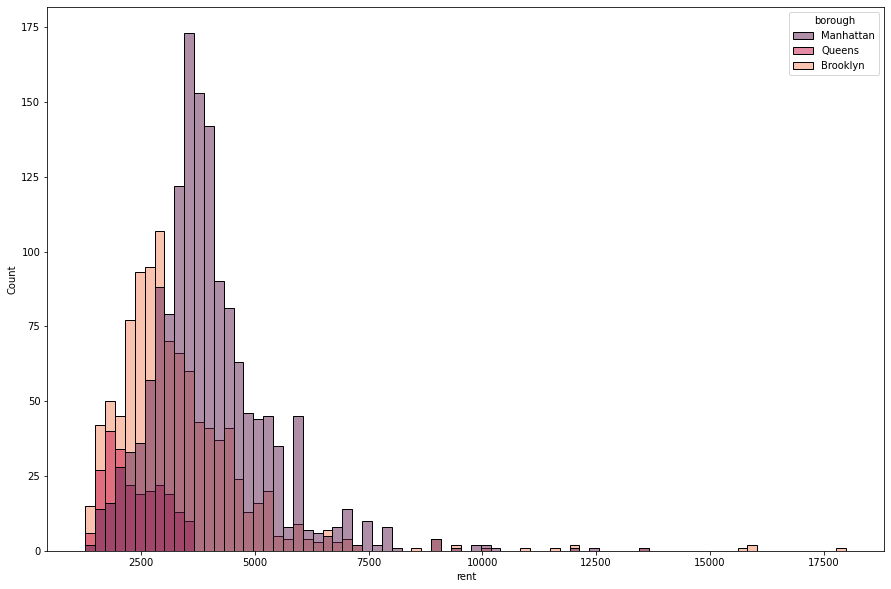

In [12]:
plt.figure(figsize=(15,10))
sns.histplot(data=nyc_flats, x='rent', hue='borough', palette='rocket')

Result: looks like data is clean but there is not enough data in Queens, compared to other boroughs, so to predict prices better we'll have to eventually create separate models for each borough.

In [13]:
# fig = px.scatter_3d(nyc_flats, x='size_sqft', y='building_age_yrs', z='rent', color='borough', width=1100, height=1000)
# fig.update_traces(marker={'size': 3})
# fig.show()

### Create MLR Models 

Multiple Linear Regression uses two or more independent variables to predict the values of the dependent variable. 

#### Model with 2 independent features
We are going to start without dividing dataset by boroughs, but with only 2 independent, but significant from potential buyer/seller point of view features: `size_sqft` and `building_age_yrs`. By doing so we will try to uncover potential rent's dependency from the size of an apartment and the age of the building where this apartment is located.  

In [14]:
# Instantiate model
model1 = LinearRegression()

# Assign features
X = nyc_flats[['size_sqft', 'building_age_yrs']]
y = nyc_flats[['rent']]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2)

# Train the model
model1.fit(X_train, y_train)

# Get accuracy & coeficiency
print("Accuracy: ", model1.score(X_test, y_test).round(2)*100, '%')
print('Coeficiency (app. size):', model1.coef_[0][0].round(2))
print('Coeficiency (building\'s age):', model1.coef_[0][1].round(2))


Accuracy:  42.0 %
Coeficiency (app. size): 3.19
Coeficiency (building's age): -7.19


Result: 
- Accuracy is too low, though we have a clean dataset. It's hard to say what exactly is causing it at this point, so let's proceed. 

- Coefficients are most helpful in determining which independent variable carries more weight. From the results above we can see that the age of building impacts cost very significantly with negative relationship, meaning when the age of the building increases the cost decreases. The size of an apartment has positive relationship, meaning the bigger the apartment the higher the cost. 

#### Visualize Results in 2D and 3D

In [152]:
def act_vs_pred(model, marker_color, line_color, X_train, y_train, borough):
    f = go.Figure(
        [
            px.scatter(x=model.predict(X_train)[:,0], y=y_train['rent'], opacity=.4).data[0],
            px.line(x=[0, 15000], y=[0, 15000]).data[0],
        ]
    )
    f.update_traces(line_color=line_color, marker=dict(color=marker_color))
    f.update_layout(width=800, height=800, title = f'Actual Rent in {borough} vs Predicted')
    f.update_xaxes(title_text ='Prices')
    f.update_yaxes(title_text ='Predicted Prices')
    return f.show()

act_vs_pred(model1, marker_color= 'plum', line_color='#663399', X_train = X_train, y_train=y_train, borough = 'all 3 Boroughs')

Text(0.5, 0.92, "Ratio of Flats' Size, Age and Rent Costs")

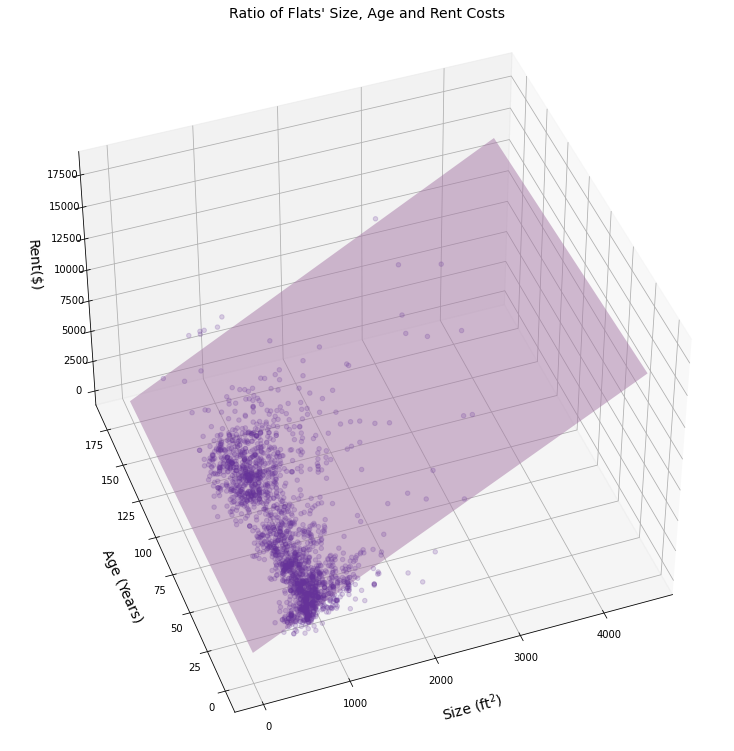

In [16]:
elev = 43
azim = -110

fig = plt.figure(figsize=(15,10))

ax = Axes3D(fig, elev=elev, azim=azim, auto_add_to_figure=False)
fig.add_axes(ax)

ax.scatter(X_train[['size_sqft']], X_train[['building_age_yrs']], y_train, c='#663399', marker='o', alpha=0.2)

ax.plot_surface(
    np.array([[0,0], [4500, 4500]]), 
    np.array([[0, 180], [0, 180]]), 
    model1.predict(
        pd.DataFrame(np.array([[0, 0, 4500, 4500], [0, 180, 0, 180]]).T,
        columns=['size_sqft', 'building_age_yrs'])).reshape((2,2)), 
        alpha=.5, 
        color='plum')

ax.set_xlabel('Size (ft$^2$)', fontsize=14, labelpad = 15)
ax.set_ylabel('Age (Years)', fontsize=14, labelpad = 15)
ax.set_zlabel('Rent($)', fontsize=14, labelpad = 15)
ax.set_title('Ratio of Flats\' Size, Age and Rent Costs', fontsize=14)

#### Models with many independent features
##### Model for Brooklin

In [76]:
def create_model(borough_name):
    # Assign features 
    X = nyc_flats[nyc_flats.borough == borough_name][[
        'size_sqft', 
        'building_age_yrs', 
        'bedrooms', 
        'bathrooms', 
        'min_to_subway', 
        'floor', 
        'has_roofdeck', 
        'has_elevator', 
        'has_dishwasher', 
        'has_patio', 
        'has_doorman', 
        'has_gym'
        ]]
        
    y = nyc_flats[nyc_flats.borough == borough_name][['rent']]

    # Instantiate model for Brooklin only
    model = LinearRegression()
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2)
    # Train model
    model.fit(X_train, y_train)
    
    return model, X_train, X_test, y_train, y_test

In [109]:
model_b, X_train_b, X_test_b, y_train_b, y_test_b = create_model(borough_name = 'Brooklyn')

def get_acc_coef(model, X_test, y_test):
    # Get accuracy & coeficiency
    print("Accuracy: ", model.score(X_test, y_test).round(2)*100, '%')

    features = [
        'size_sqft', 
        'building_age_yrs', 
        'bedrooms', 
        'bathrooms', 
        'min_to_subway', 
        'floor', 
        'has_roofdeck', 
        'has_elevator', 
        'has_dishwasher', 
        'has_patio', 
        'has_doorman', 
        'has_gym'
        ]

    for i in range(len(features)):
        print(features[i], model_b.coef_[0][i].round(2))
    return

get_acc_coef(model_b, X_test_b, y_test_b)

Accuracy:  65.0 %
size_sqft 2.66
building_age_yrs -3.88
bedrooms -133.7
bathrooms 820.88
min_to_subway -32.82
floor 12.35
has_roofdeck 175.0
has_elevator 85.33
has_dishwasher 71.98
has_patio 347.79
has_doorman -304.12
has_gym 415.3


In [110]:
act_vs_pred(model_b, marker_color= '#FF7F50', line_color='#663399', X_train=X_train_b, y_train=y_train_b, borough = 'Brooklyn')

##### Model for Manhattan

In [143]:
model_m, X_train_m, X_test_m, y_train_m, y_test_m = create_model(borough_name = 'Manhattan')
get_acc_coef(model_m, X_test_m, y_test_m)

Accuracy:  62.0 %
size_sqft 2.66
building_age_yrs -3.88
bedrooms -133.7
bathrooms 820.88
min_to_subway -32.82
floor 12.35
has_roofdeck 175.0
has_elevator 85.33
has_dishwasher 71.98
has_patio 347.79
has_doorman -304.12
has_gym 415.3


In [145]:
act_vs_pred(model_m, marker_color= '#1E90FF', line_color='#663399', X_train=X_train_m, y_train=y_train_m, borough = 'Manhattan')

##### Model for Queens

In [172]:
model_q, X_train_q, X_test_q, y_train_q, y_test_q = create_model(borough_name = 'Queens')
get_acc_coef(model_q, X_test_q, y_test_q)

Accuracy:  68.0 %
size_sqft 2.66
building_age_yrs -3.88
bedrooms -133.7
bathrooms 820.88
min_to_subway -32.82
floor 12.35
has_roofdeck 175.0
has_elevator 85.33
has_dishwasher 71.98
has_patio 347.79
has_doorman -304.12
has_gym 415.3


In [173]:
act_vs_pred(model_q, marker_color= '#9ACD32', line_color='#663399', X_train=X_train_q, y_train=y_train_q, borough = 'Queens')

TBC